# Introduction


This notebook concerns the spectrophotometer located on the Regional Cabled Array
shallow profiler at the Oregon Slope Base site. The instrument operates for two
intervals each day, during local midnight and noon profiler ascents. 


The source data order was large (4GB)
spanning from January 1 through June 1 2021; and across 83 channels. 


The data used here is a subset: 2 channels (28 and 56) and 12 days. The results
fit within the repository. 



The spectrophotometer records both optical absorption (OA) and beam attenuation (BA).
Sampling rate is roughly two samples per second. 



# Part 0. Imports, utilities


This code makes us of additional utilities found in **`SpectrophotometerModule.py`**. 
It also leverages the pre-existing profiler metadata. For more on this see the Technical Guide
notebook in this repository.


In [10]:
# Set up this notebook to use code from an accompanying Python module file
from SpectrophotometerModule import *
print('\nJupyter Notebook running Python {}'.format(sys.version_info[0]))


Jupyter Notebook running Python 3


# Part 1. Consolidating source data + load/check

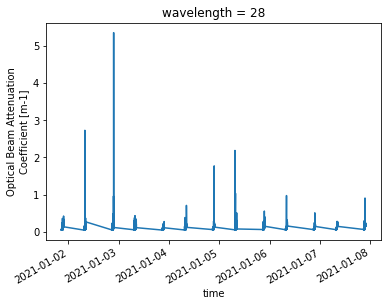

In [2]:
# For data load/prep see SpectrophotometerModule.py.

s = xr.open_dataset('../RepositoryData/rca/optaa/subset2021.nc')
s.ba.sel(wavelength=28).sel(time=slice(dt64_from_doy(2021, 1),dt64_from_doy(2021, 8))).plot()

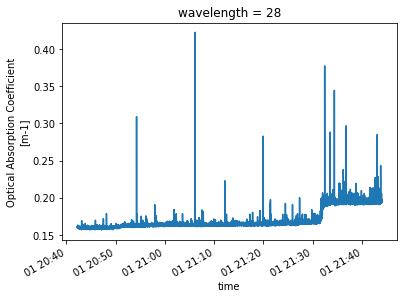

In [11]:
# In profile 'p': index 8 is the first ascent of 2021 where the spectrophotometer collected data
channel = 28
t0 = p["ascent_start"][8]
t1 = p["ascent_end"][8]
ss=s.sel(wavelength=channel).sel(time=slice(t0, t1))
ss.oa.plot()

## Part 2. Beam attenuation and optical absorption charts


The four charting code blocks below demonstrate overlaying ('bundle view') 10 days worth of profiles. 
These are separated into noon and midnight profiles; and since we have both beam attenuation and
optical absorption the total is 2 x 2 = 4 charts. 


The work halts here for the moment (with some coding remarks at the bottom) because the data are quite noisy. 
A single profile takes about 60 minutes; which at 2Hz sampling is 7200 data points. Over ten days
this will come to 70k data points *per channel*. There are about 80 working channels. This sketch
is confined to only three of these: 0 (or 1), 40 and 80. So in summary we have four charts with about
one million data points and a big *gap* in the context needed to go further...

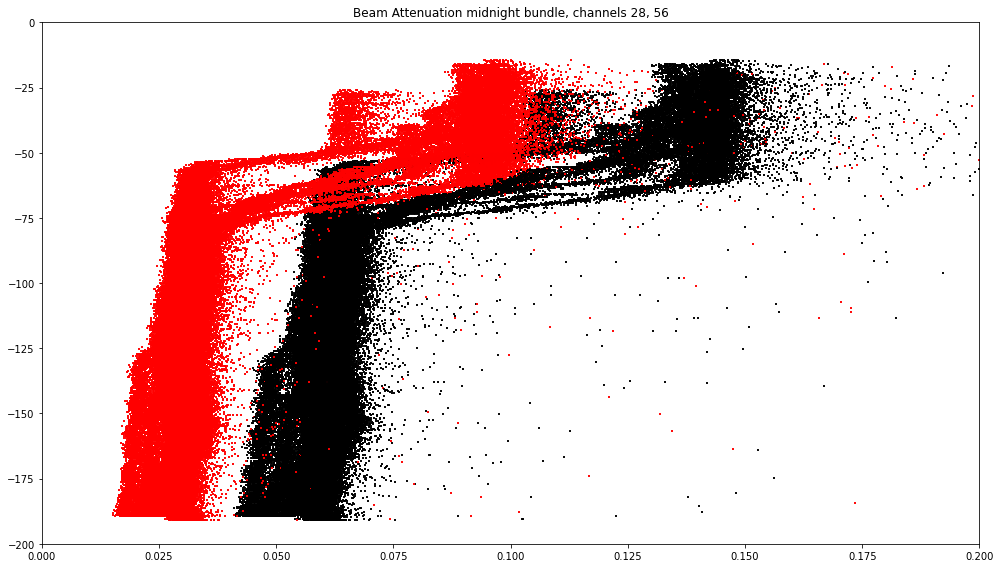

In [18]:
pm = GenerateTimeWindowIndices(p, dt64_from_doy(2021, 1), dt64_from_doy(2021, 12), midn0, midn1)
pn = GenerateTimeWindowIndices(p, dt64_from_doy(2021, 1), dt64_from_doy(2021, 12), noon0, noon1)
nm, nn = len(pm), len(pn)
i0, i1 = 2, 12 

# midnight bundle, beam attenuation    
fig, ax = plt.subplots(figsize=(14, 8), tight_layout=True)

for i in range(i0, i1): # nm is 146 for this dataset
    t0, t1 = p["ascent_start"][pm[i]], p["ascent_end"][pm[i]]
    ba = s.sel(wavelength=28).sel(time=slice(t0,  t1)).ba
    z  = -s.sel(wavelength=28).sel(time=slice(t0, t1)).depth            # z is negated depth to imply below sea surface
    ax.scatter(ba, z, marker=',', s=1., color=colorBA28)               # plot: ax.plot(ba, z, ms = 4., color=colorBA40, mfc=colorBA40)
    ba = s.sel(wavelength=56).sel(time=slice(t0,  t1)).ba
    z  = -s.sel(wavelength=56).sel(time=slice(t0, t1)).depth
    ax.scatter(ba, z, marker=',', s=1., color=colorBA56)

ax.set(title = 'Beam Attenuation midnight bundle, channels 28, 56')
ax.set(xlim = (ba_lo, ba_hi), ylim = (-200, 0.))
plt.show()

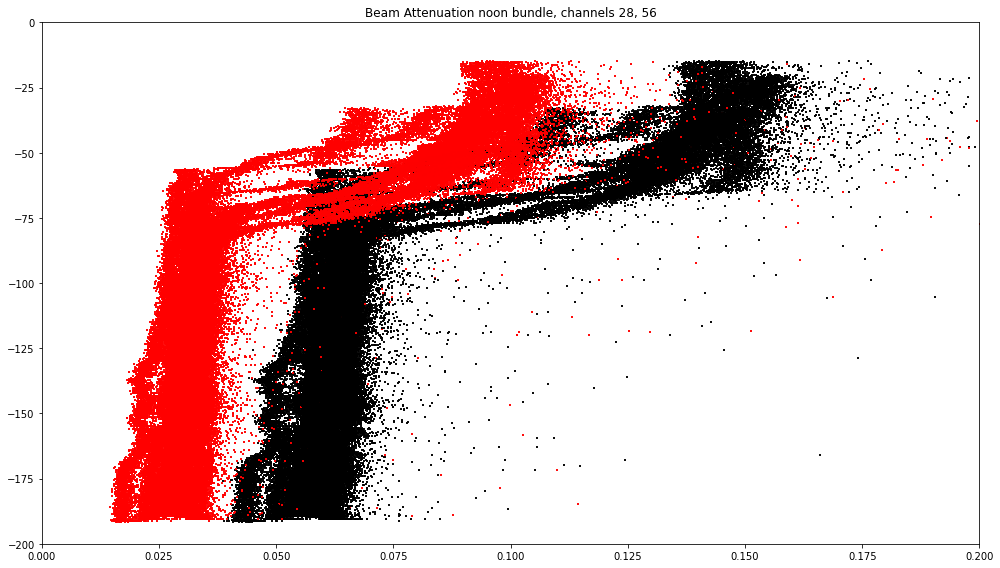

In [19]:
# noon bundle, beam attenuation    
fig, ax = plt.subplots(figsize=(14, 8), tight_layout=True)

for i in range(i0, i1): # nm is 149 for this dataset
    t0, t1 = p["ascent_start"][pn[i]], p["ascent_end"][pn[i]]
    ba = s.sel(wavelength=28).sel(time=slice(t0,  t1)).ba
    z  = -s.sel(wavelength=28).sel(time=slice(t0, t1)).depth
    ax.scatter(ba, z, marker=',', s=1., color=colorBA28)
    ba = s.sel(wavelength=56).sel(time=slice(t0,  t1)).ba
    z  = -s.sel(wavelength=56).sel(time=slice(t0, t1)).depth
    ax.scatter(ba, z, marker=',', s=1., color=colorBA56)

ax.set(title = 'Beam Attenuation noon bundle, channels 28, 56')
ax.set(xlim = (ba_lo, ba_hi), ylim = (-200, 0.))
plt.show()

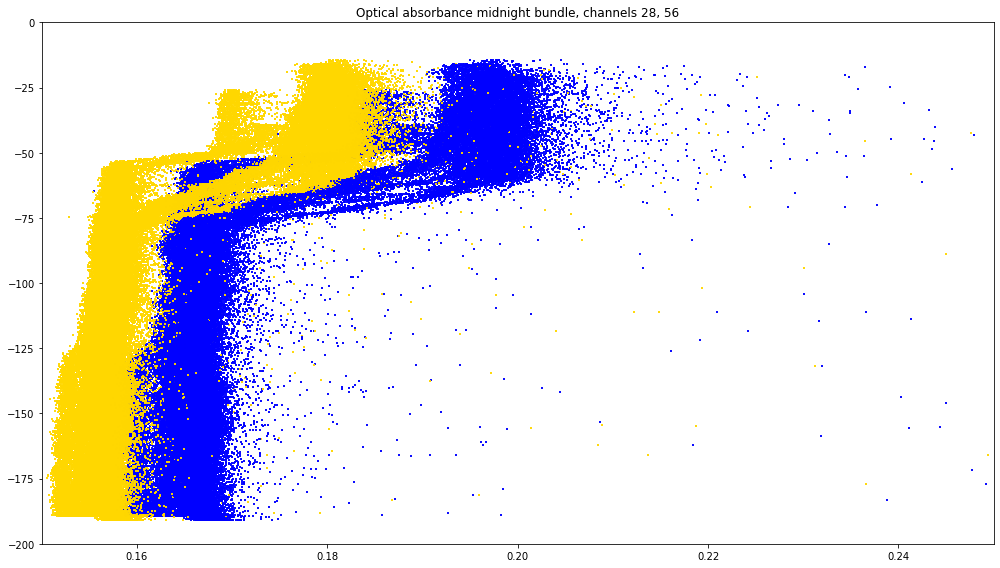

In [20]:
# midnight bundle, optical absorbance  
fig, ax = plt.subplots(figsize=(14, 8), tight_layout=True)

for i in range(i0, i1): # nm is 146 for this dataset
    t0, t1 = p["ascent_start"][pm[i]], p["ascent_end"][pm[i]]
    oa = s.sel(wavelength=28).sel(time=slice(t0,  t1)).oa
    z  = -s.sel(wavelength=28).sel(time=slice(t0, t1)).depth
    ax.scatter(oa, z, marker=',', s=1., color=colorOA28)
    oa = s.sel(wavelength=56).sel(time=slice(t0,  t1)).oa
    z  = -s.sel(wavelength=56).sel(time=slice(t0, t1)).depth
    ax.scatter(oa, z, marker=',', s=1., color=colorOA56)

ax.set(title = 'Optical absorbance midnight bundle, channels 28, 56')
ax.set(xlim = (oa_lo, oa_hi), ylim = (-200, 0.))
plt.show()

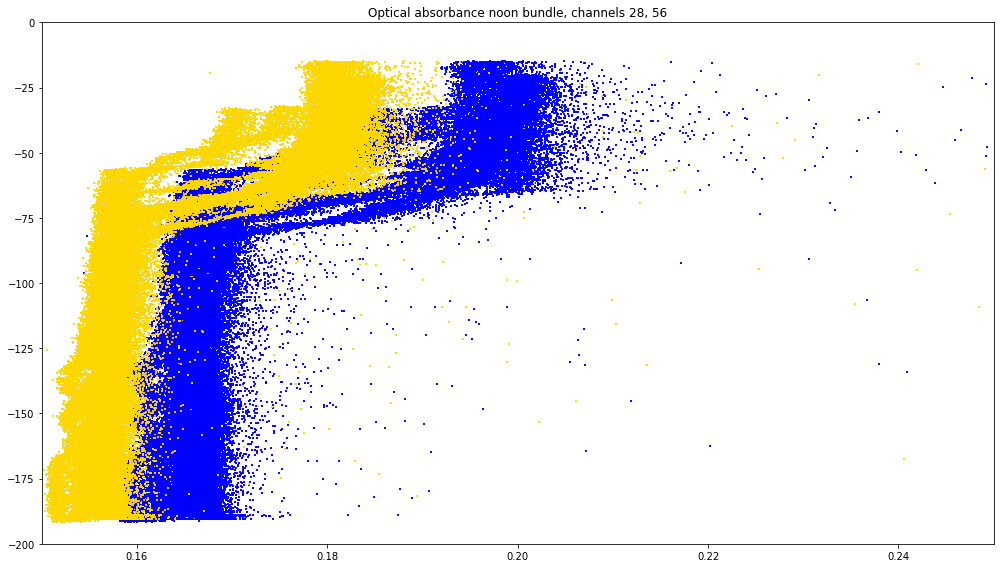

In [21]:
# noon bundle, optical absorbance  
fig, ax = plt.subplots(figsize=(14, 8), tight_layout=True)

for i in range(i0, i1): # nn is 149 for this dataset
    t0, t1 = p["ascent_start"][pn[i]], p["ascent_end"][pn[i]]
    oa = s.sel(wavelength=28).sel(time=slice(t0,  t1)).oa
    z  = -s.sel(wavelength=28).sel(time=slice(t0, t1)).depth
    ax.scatter(oa, z, marker=',', s=1., color=colorOA28)
    oa = s.sel(wavelength=56).sel(time=slice(t0,  t1)).oa
    z  = -s.sel(wavelength=56).sel(time=slice(t0, t1)).depth
    ax.scatter(oa, z, marker=',', s=1., color=colorOA56)

ax.set(title = 'Optical absorbance noon bundle, channels 28, 56')
ax.set(xlim = (oa_lo, oa_hi), ylim = (-200, 0.))
plt.show()

### Interpretation


We do have a clear pycnocline structure in the 50 to 75 meter depth range. This suggests building another
data subset to match the March 2021 data found in the BioOptics notebook. 



These data are obviously noisy; so some subject matter expertise is needed to carry the interpretation further.



### Code fragments


The following code pertains to multi-plot building, data subsets and interactive views of the data. 
It should be relocated out of this notebook to the reference material. 


```
# declaring figure and axes
# fig, axs = plt.subplots(fig_n_down, fig_n_across, figsize=(fig_width * fig_n_across, fig_height*fig_n_down), tight_layout=True)

# referencing one of these axes
# axs[day_index][3]

# using index selection 
# .isel(wavelength=oa_plot_wavelength)

################################
# interact example
################################

# intro text:
# We have two charts per day (midnight and noon) and two observation types (OA and BA). This is 2 x 2 charts. 
#   The display is 2 such blocks, left and right, for 4 x 2 charts. When the checkbox is True we use the passed
#   values for the right chart and the stored values for the left. When the checkbox is False we use the passed
#   values for the left chart and the stored values for the right. In either case the updated states are stored
#   in global state variables. If the day is 0 there is no plot. A four-chart state is { day_ba, day_oa, channel_oa }.

# sliders etc set up:
# interact(spectrophotometer_display, \
#          sel_day_ba=widgets.IntSlider(min=1, max=31, step=1, value=9,  continuous_update=False, description='BAtten'),
#          sel_day_oa=widgets.IntSlider(min=1, max=31, step=1, value=9,  continuous_update=False, description='OAbs'),
#          sel_channel_oa=widgets.IntSlider(min=1, max=82, step=1, value=49,  continuous_update=False, description='OA Chan'),
#          right = widgets.ToggleButton(value=False, description='use right charts', disabled=False,
#              button_style='', tooltip='Description', icon='check')
#     )

# corresponding function: 
# def spectrophotometer_display(sel_day_ba, sel_day_oa, sel_channel_oa, right):
```